# LSTM -BI 


In [ ]:
# LSTM -BI 

In [1]:
!pip install pandas_datareader==0.10.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
start = '2004-08-18'
end = '2022-01-20'

df = data.DataReader('GOOG', 'yahoo', start, end)

df.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2004-08-19  51.835709  47.800831  49.813290  49.982655  44871361.0  49.982655
2004-08-20  54.336334  50.062355  50.316402  53.952770  22942874.0  53.952770
2004-08-23  56.528118  54.321388  55.168217  54.495735  18342897.0  54.495735
2004-08-24  55.591629  51.591621  55.412300  52.239197  15319808.0  52.239197
2004-08-25  53.798351  51.746044  52.284027  52.802086   9232276.0  52.802086

In [4]:
df.tail()

High          Low         Open        Close     Volume  \
Date                                                                        
2022-01-13  2863.709961  2778.280029  2836.810059  2782.620117  1328300.0   
2022-01-14  2824.010010  2750.000000  2750.000000  2795.729980  1190700.0   
2022-01-18  2747.830078  2712.340088  2732.000000  2725.810059  1369100.0   
2022-01-19  2767.989990  2710.000000  2738.770020  2713.040039  1039800.0   
2022-01-20  2758.239990  2662.889893  2730.280029  2670.129883  1093900.0   

              Adj Close  
Date                     
2022-01-13  2782.620117  
2022-01-14  2795.729980  
2022-01-18  2725.810059  
2022-01-19  2713.040039  
2022-01-20  2670.129883

In [5]:
df = df.reset_index()
df.head()

Date       High        Low       Open      Close      Volume  \
0 2004-08-19  51.835709  47.800831  49.813290  49.982655  44871361.0   
1 2004-08-20  54.336334  50.062355  50.316402  53.952770  22942874.0   
2 2004-08-23  56.528118  54.321388  55.168217  54.495735  18342897.0   
3 2004-08-24  55.591629  51.591621  55.412300  52.239197  15319808.0   
4 2004-08-25  53.798351  51.746044  52.284027  52.802086   9232276.0   

   Adj Close  
0  49.982655  
1  53.952770  
2  54.495735  
3  52.239197  
4  52.802086

In [6]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

High        Low       Open      Close      Volume
0  51.835709  47.800831  49.813290  49.982655  44871361.0
1  54.336334  50.062355  50.316402  53.952770  22942874.0
2  56.528118  54.321388  55.168217  54.495735  18342897.0
3  55.591629  51.591621  55.412300  52.239197  15319808.0
4  53.798351  51.746044  52.284027  52.802086   9232276.0

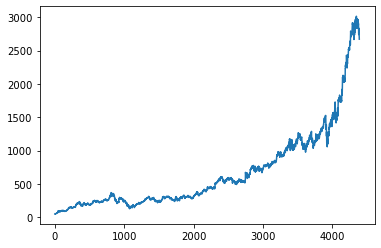

In [7]:
plt.plot(df.Close)

In [8]:
df

High          Low         Open        Close      Volume
0       51.835709    47.800831    49.813290    49.982655  44871361.0
1       54.336334    50.062355    50.316402    53.952770  22942874.0
2       56.528118    54.321388    55.168217    54.495735  18342897.0
3       55.591629    51.591621    55.412300    52.239197  15319808.0
4       53.798351    51.746044    52.284027    52.802086   9232276.0
...           ...          ...          ...          ...         ...
4382  2863.709961  2778.280029  2836.810059  2782.620117   1328300.0
4383  2824.010010  2750.000000  2750.000000  2795.729980   1190700.0
4384  2747.830078  2712.340088  2732.000000  2725.810059   1369100.0
4385  2767.989990  2710.000000  2738.770020  2713.040039   1039800.0
4386  2758.239990  2662.889893  2730.280029  2670.129883   1093900.0

[4387 rows x 5 columns]

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4382    2870.679209
4383    2870.156809
4384    2868.824910
4385    2867.530710
4386    2865.321909
Name: Close, Length: 4387, dtype: float64

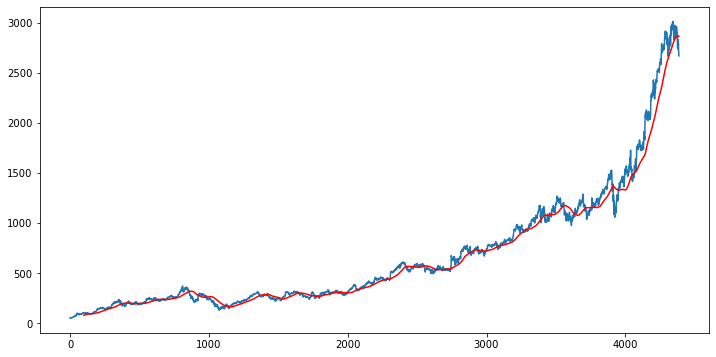

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4382    2684.307854
4383    2687.597754
4384    2690.099054
4385    2692.540504
4386    2694.642754
Name: Close, Length: 4387, dtype: float64

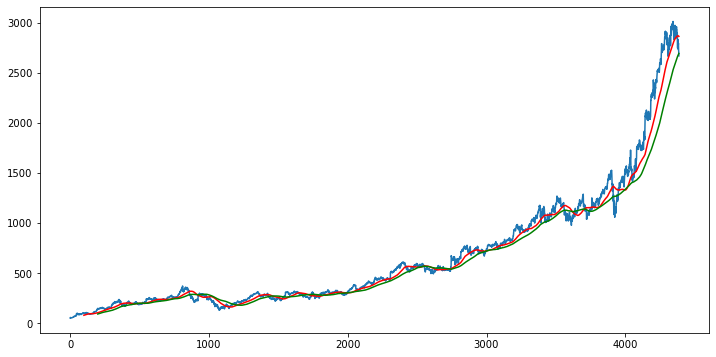

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(4387, 5)

In [14]:
# Splitting data into training and testing 

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3070, 1)
(1317, 1)


In [16]:
data_training.head()

Close
0  49.982655
1  53.952770
2  54.495735
3  52.239197
4  52.802086

In [17]:
data_testing.head()

Close
3070  795.349976
3071  795.369995
3072  784.539978
3073  783.609985
3074  768.700012

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))




In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[2.15365561e-04],
       [5.41667401e-03],
       [6.12802057e-03],
       ...,
       [1.00000000e+00],
       [9.92872971e-01],
       [9.81606013e-01]])

In [20]:
data_training_array.shape

(3070, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(2970, 100, 1)

In [23]:
# ML MODEL

In [24]:
from tensorflow.keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True,
              input_shape = (x_train.shape[1], 1 )))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))




model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
93/93 [==============================] - 20s 137ms/step - loss: 0.0246
Epoch 2/50
93/93 [==============================] - 11s 120ms/step - loss: 0.0062
Epoch 3/50
93/93 [==============================] - 11s 120ms/step - loss: 0.0054
Epoch 4/50
93/93 [==============================] - 11s 120ms/step - loss: 0.0047
Epoch 5/50
93/93 [==============================] - 12s 128ms/step - loss: 0.0046
Epoch 6/50
93/93 [==============================] - 12s 126ms/step - loss: 0.0040
Epoch 7/50
93/93 [==============================] - 12s 131ms/step - loss: 0.0040
Epoch 8/50
93/93 [==============================] - 12s 128ms/step - loss: 0.0039
Epoch 9/50
93/93 [==============================] - 12s 127ms/step - loss: 0.0035
Epoch 10/50
93/93 [==============================] - 12s 126ms/step - loss: 0.0037
Epoch 11/50
93/93 [==============================] - 12s 127ms/step - loss: 0.0034
Epoch 12/50
93/93 [==============================] - 12s 126ms/step - loss: 0.0030
Epoch 13/50
9

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

Close
3070  795.349976
3071  795.369995
3072  784.539978
3073  783.609985
3074  768.700012

In [30]:
data_training.tail(100)

Close
2970  716.650024
2971  728.280029
2972  728.580017
2973  719.409973
2974  718.359985
...          ...
3065  796.969971
3066  799.369995
3067  813.109985
3068  807.669983
3069  799.070007

[100 rows x 1 columns]

In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [33]:
final_df.head()

Close
0  716.650024
1  728.280029
2  728.580017
3  719.409973
4  718.359985

In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02062731],
       [0.02558485],
       [0.02571273],
       ...,
       [0.87707599],
       [0.87163249],
       [0.85334109]])

In [35]:
input_data.shape

(1417, 1)

In [36]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])



In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1317, 100, 1)
(1317,)


In [38]:
# Making predictions

In [39]:
y_predicted = model.predict(x_test)

In [40]:
y_predicted.shape

(1317, 1)

In [41]:
y_test

array([0.0541749 , 0.05418343, 0.0495669 , ..., 0.87707599, 0.87163249,
       0.85334109])

In [42]:
y_predicted

array([[0.16410272],
       [0.16469893],
       [0.16519465],
       ...,
       [0.8367473 ],
       [0.8331908 ],
       [0.8297007 ]], dtype=float32)

In [43]:
scaler.scale_

array([0.00042627])

In [44]:
scale_factor = 1/0.00042627
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

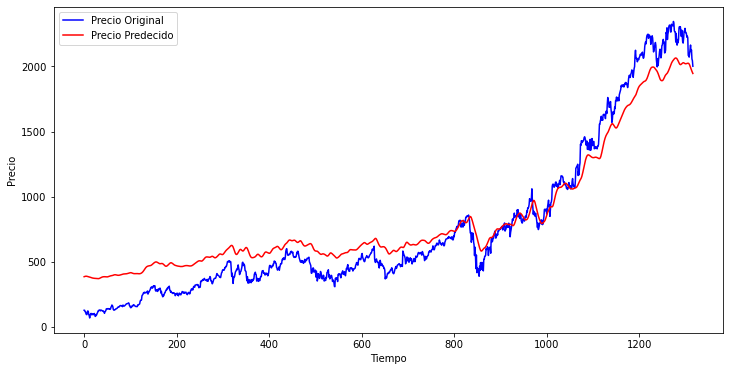

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Precio Original')
plt.plot(y_predicted, 'r', label= 'Precio Predecido')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=385a31e8-cb86-4594-b703-7bc4e84e8efb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>